# Data preprocessing

Data preprocessing in machine learning is an important step that involves preparing and cleaning data before using it to train models. This process may include several steps:

* Data Cleanup: Deleting or correcting incorrect, incomplete, or duplicate data. This may include processing missing values, removing outliers, and correcting errors.
* Data transformation: Changing the format or structure of the data for ease of analysis. This may include normalization or standardization of numeric features, as well as encoding categorical variables (for example, using one-hot encoding).
* Feature Selection: Selecting the most significant features to train the model, which can help improve performance and reduce the complexity of the model.
* Data separation: Dividing the data into training, validation and test samples so that the quality of the model can be assessed on independent data.
* Data augmentation: Creating additional data by applying various transformations to existing data, which can help improve the generalizing ability of the model.

Data preprocessing is critically important because the quality of the input data directly affects the quality and accuracy of the machine learning model.

In [ ]:
# disabling the output of warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# connecting libraries
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-colorblind')

In [ ]:
# connecting a disk
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
# the dataset is taken here: https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019
# uploading data
data = pd.read_csv('/content/gdrive/MyDrive/курсы/DM/Модуль 1 Разведочный анализ и предварительная обработка данных/sao-paulo-properties-april-2019.csv')
data.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [ ]:
list(data.columns) # list of feature names

['Price',
 'Condo',
 'Size',
 'Rooms',
 'Toilets',
 'Suites',
 'Parking',
 'Elevator',
 'Furnished',
 'Swimming Pool',
 'New',
 'District',
 'Negotiation Type',
 'Property Type',
 'Latitude',
 'Longitude']

In [ ]:
data.info() # information about the signs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

When calling the info() method, you can find out important information about the dataset. So the information presented in the 3rd column called "Type" allows us to draw the following conclusions:
1. 3 categorical features (object).
2. 2 features are continuous (float64).
3. 11 features accept only integer values (int64).

## Correlation

**Collinear** are features that strongly correlate with each other. In machine learning, this leads to a decrease in data generalization performance due to high variance and less interpretability of the model.

Let's try to find the signs correlated with 'Price'

In [ ]:
data_num = data.select_dtypes(include = ['float64', 'int64']) # we select only numerical signs
data_num.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,-23.525025,-46.482436


In [ ]:
corr_data = data_num.corr()['Price'][:-1]
correlated_features_list = corr_data[abs(corr_data) > 0.2].sort_values(ascending=False)
print("There are {} strongly values with SalePrice:\n{}".format(len(correlated_features_list),
                                                                          correlated_features_list))

There are 7 strongly values with SalePrice:
Price      1.000000
Size       0.378450
Toilets    0.341887
Parking    0.337959
Suites     0.313267
Rooms      0.272267
Condo      0.203857
Name: Price, dtype: float64


Now we have a list of variables correlated with the cost of housing (it is clear that even the most correlated features do not have a strong relationship), but this list is incomplete, since we know that the correlation depends on emissions. So we can proceed as follows:

1. Plot the numerical characteristics and see which of them have very few emissions or explicable emissions.
2. Remove outliers and recalculate the correlation.

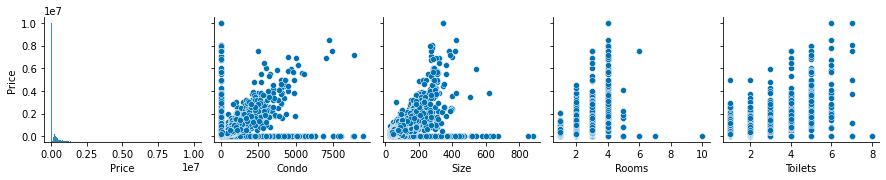

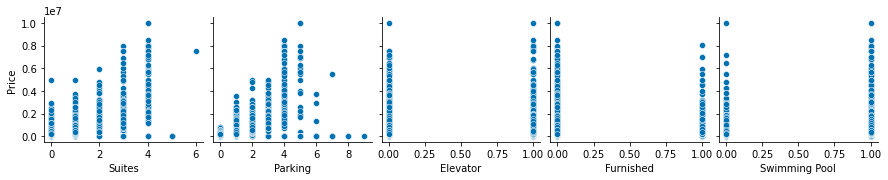

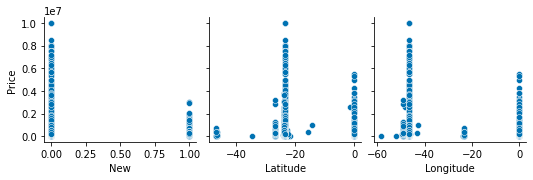

In [ ]:
for i in range(0, len(data_num.columns), 5):
    sns.pairplot(data=data_num,
                 x_vars=data_num.columns[i:i+5],
                 y_vars=['Price'])

It can be seen that most of the features can be considered as categorical (they are located on the x=const lines), and the Condo and Size signs as continuous quantities. Their correlation is severely disrupted due to the points that are on the lines y = 0 and x = 0, but these are not outliers. Let's try to remove these lines from Condo and Size and recalculate their correlations.

In [ ]:
cont_data = data[['Size', 'Condo', 'Price']]
cont_data[cont_data['Price'] < 5] = np.NaN
cont_data[cont_data[['Size', 'Condo']] < 5] = np.NaN
cont_data.dropna(axis=0, inplace=True)

cont_data.shape

(11635, 3)

In [ ]:
corr_data = cont_data.corr()['Price'][:-1]
correlated_features_list = corr_data[abs(corr_data) > 0.3].sort_values(ascending=False)
print("There are {} correlated values with Price:\n{}".format(len(correlated_features_list),
                                                                          correlated_features_list))

There are 2 correlated values with Price:
Size     0.334302
Condo    0.314130
Name: Price, dtype: float64


You can see that the Conda correlation has grown to the Size level, but still the relationship is not very strong.

**Correlation between features**

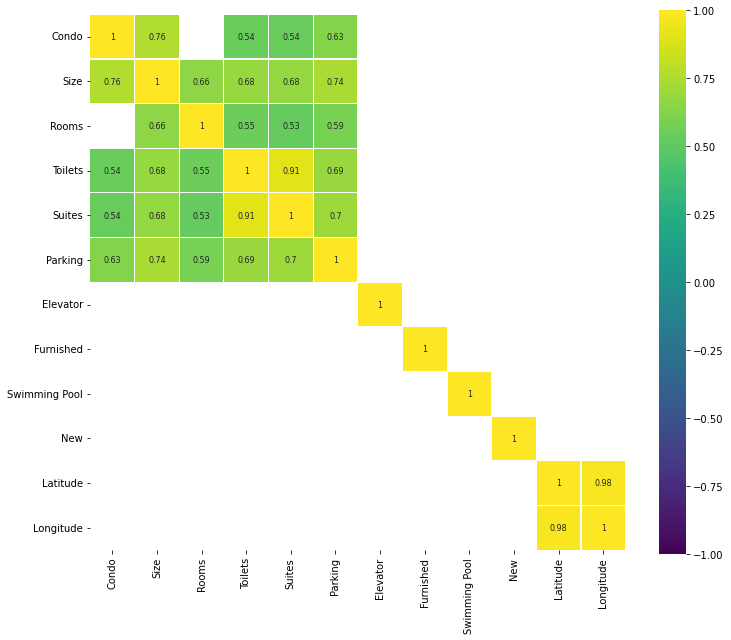

In [ ]:
corr = data_num.drop('Price', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Many features correlate with each other.

For example, the number of toilets in an apartment correlates with the size, which is generally logical. Or the size of the apartment with the number of parking spaces.

Thus, for highly correlated features (Suites/Toilets, Latitude/Longtitude) it makes sense to include only one of the pair in the model.

## Visual analysis of features

In [ ]:
df_categ = data.select_dtypes(include=['int64', 'O']).drop(['Condo', 'Size'], axis=1)
df_categ.head()

,Price,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type
0,930,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment
1,1000,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment
2,1000,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment
3,1000,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment
4,1300,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment


Let's display some of the features \
(we'll use a box and whiskers for visualization: https://en.wikipedia.org/wiki/Box_plot)


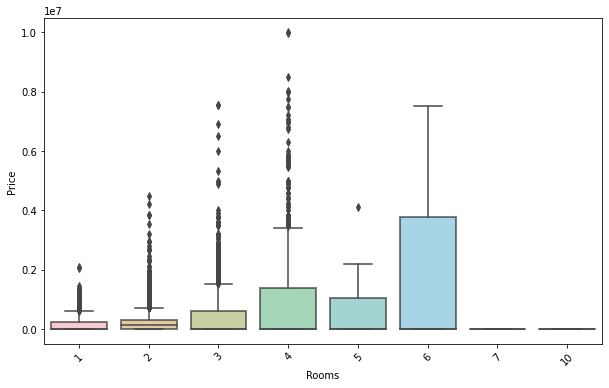

In [ ]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Rooms', y='Price', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45);

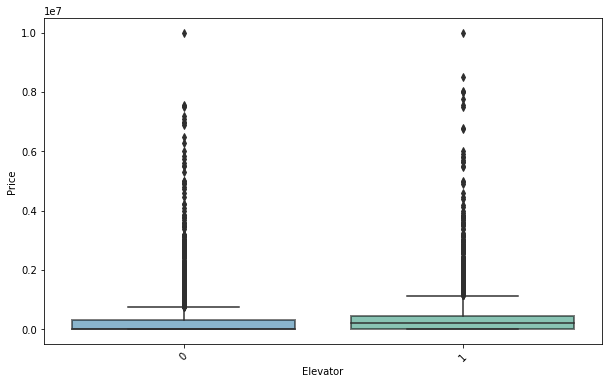

In [ ]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Elevator', y='Price', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45);

Let's display some of the Features

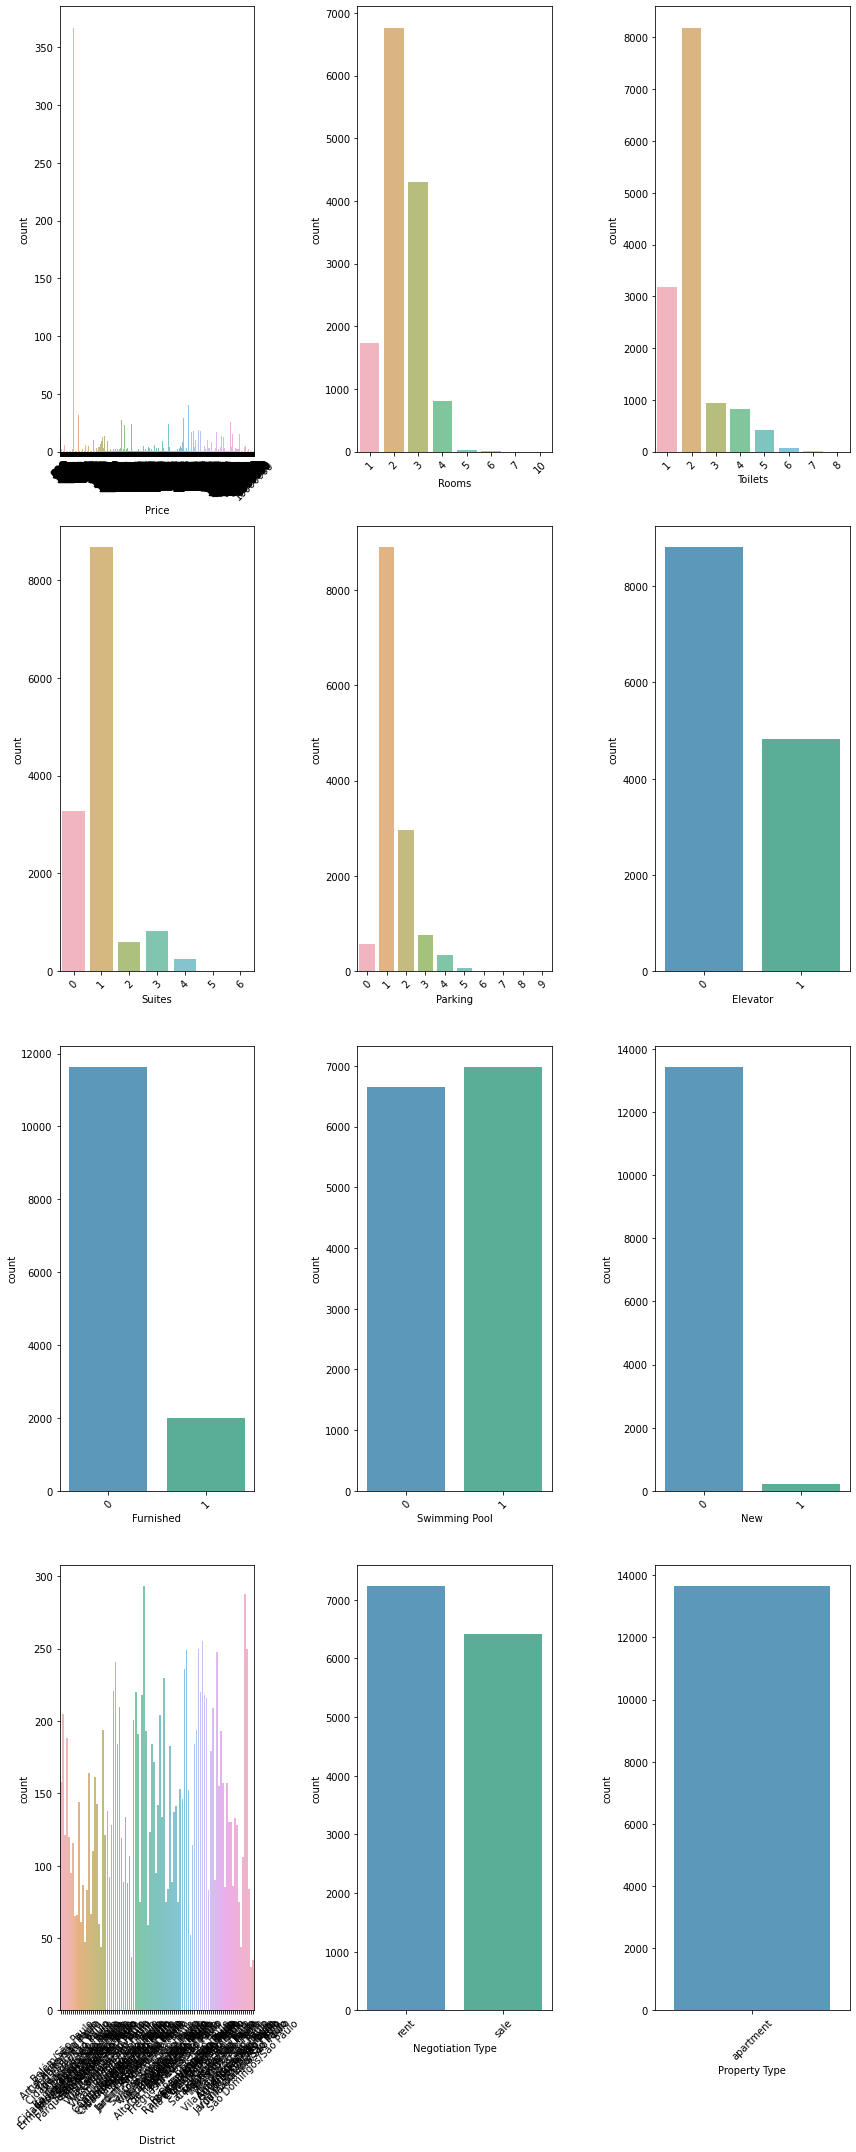

In [ ]:
fig, axes = plt.subplots(round(len(df_categ.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_categ.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_categ.columns[i], alpha=0.7, data=df_categ, ax=ax)

fig.tight_layout()

The New attribute contains too few values of 1, so it can be discarded. The Property Type attribute contains a single value, so it can be discarded. These Features do not carry information for further modeling.

1. Thus, there were no missing values in the dataset.
2. Perhaps due to the fact that you constantly have to deal with signs such as Toilets, longitude.
3. After we received the qualification grades, we chose a New type of property.
4. The final set:
"Price",
"Condominium",
"Area",
"Rooms",
"Apartments",
"Parking",
"Elevator",
"Furnished",
"Pool",
"Area",
"Type of negotiations",
"Latitude",
"Longitude"

In [ ]:
data_f = data.drop(['Toilets','Longitude','New','Property Type'], axis =1)
data_f.head()

,Price,Condo,Size,Rooms,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Negotiation Type,Latitude
0,930,220,47,2,1,1,0,0,0,Artur Alvim/São Paulo,rent,-23.543138
1,1000,148,45,2,1,1,0,0,0,Artur Alvim/São Paulo,rent,-23.550239
2,1000,100,48,2,1,1,0,0,0,Artur Alvim/São Paulo,rent,-23.542818
3,1000,200,48,2,1,1,0,0,0,Artur Alvim/São Paulo,rent,-23.547171
4,1300,410,55,2,1,1,1,0,0,Artur Alvim/São Paulo,rent,-23.525025


## Coding of categorical features

https://www.geeksforgeeks.org/encoding-categorical-data-in-sklearn/

Most machine learning models are not able to work with categorical features,
so we need to encode them with numeric values. \

In [ ]:
# let's consider a categorical feature
data_f['District'].value_counts()

Moema/São Paulo              293
Mooca/São Paulo              288
Brás/São Paulo               255
Brooklin/São Paulo           250
Bela Vista/São Paulo         250
                            ... 
Jardim São Luis/São Paulo     44
São Rafael/São Paulo          44
Grajaú/São Paulo              37
São Domingos/São Paulo        35
Perus/São Paulo               30
Name: District, Length: 96, dtype: int64

In [ ]:
# let's consider a categorical feature
data_f['Negotiation Type'].value_counts()

rent    7228
sale    6412
Name: Negotiation Type, dtype: int64

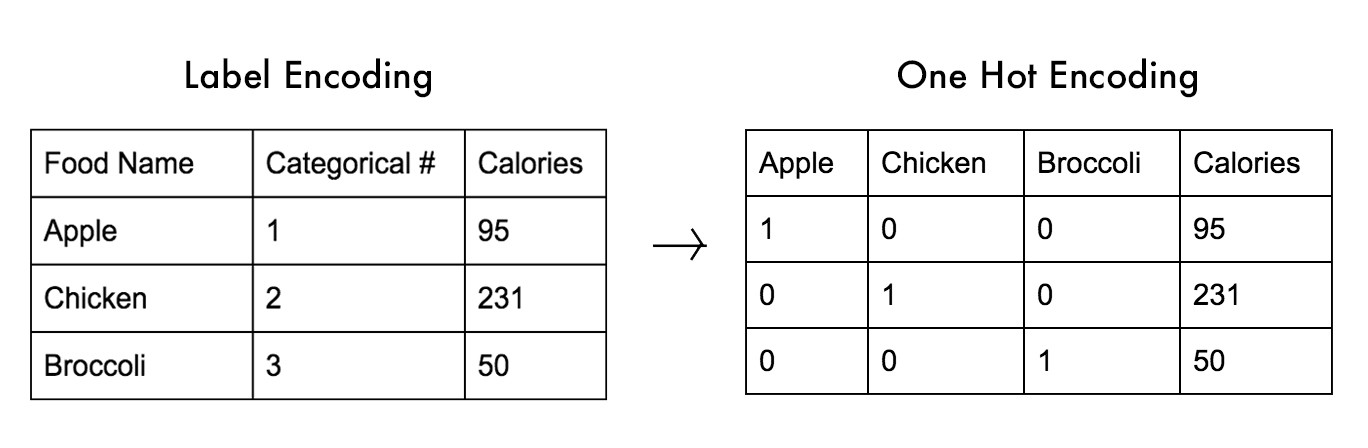

In [ ]:
# an easy way is to replace the value with a numeric one
feature = {"Negotiation Type": {"rent": 1, "sale": 2}}
data_encode = data_f.replace(feature)
data_encode['Negotiation Type'].value_counts()

1    7228
2    6412
Name: Negotiation Type, dtype: int64

In [ ]:
# an easy way is to replace the value with a numeric one
data_f["Negotiation Type"] = data_f["Negotiation Type"].astype('category')
data_f["Negotiation Type cat"] = data_f["Negotiation Type"].cat.codes
data_f['Negotiation Type cat'].value_counts()

0    7228
1    6412
Name: Negotiation Type cat, dtype: int64

In [ ]:
data_f = data_f.drop('Negotiation Type cat', axis = 1)

In [ ]:
# unitary encoding or one hot encoding
pd.get_dummies(data_f, columns=["Negotiation Type"]).head()
# instead of Negotiation Type, 2 new features appeared: Negotiation Type_rent and Negotiation Type_sale with corresponding values ​​1 and 0

,Price,Condo,Size,Rooms,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Latitude,Negotiation Type cat,Negotiation Type_rent,Negotiation Type_sale
0,930,220,47,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.543138,0,1,0
1,1000,148,45,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.550239,0,1,0
2,1000,100,48,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.542818,0,1,0
3,1000,200,48,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.547171,0,1,0
4,1300,410,55,2,1,1,1,0,0,Artur Alvim/São Paulo,-23.525025,0,1,0


In [ ]:
# advanced version, we will install a library for it
!pip3 install category_encoders

     |████████████████████████████████| 86 kB 2.2 MB/s 


In [ ]:
import category_encoders as ce

In [ ]:
# Contrast Coding - This type of coding splits the feature into levels (each containing only values ​​related to one category).
# Then, for each level, some statistics are calculated.
# The method is suitable for coding nominal and partially ordered features.
# We will use Backward Difference encoding - this method compares the average for a level with the average of the previous level

data_tmp = data_f.copy()
encoder = ce.BackwardDifferenceEncoder(cols=["District"])
encoder.fit(data_tmp, verbose=1)

BackwardDifferenceEncoder(cols=['District'],
                          mapping=[{'col': 'District',
                                    'mapping':      District_0  District_1  District_2  District_3  District_4  District_5  \
 1    -0.989583   -0.979167    -0.96875   -0.958333   -0.947917     -0.9375   
 2     0.010417   -0.979167    -0.96875   -0.958333   -0.947917     -0.9375   
 3     0.010417    0.020833    -0.96875   -0.958333   -0.947917     -0.9375   
 4     0.010417    0.020833     0.03125   -0.958333   -0.947917     -0.9375   
 5     0.010...
 1     -0.041667     -0.03125    -0.020833    -0.010417  
 2     -0.041667     -0.03125    -0.020833    -0.010417  
 3     -0.041667     -0.03125    -0.020833    -0.010417  
 4     -0.041667     -0.03125    -0.020833    -0.010417  
 5     -0.041667     -0.03125    -0.020833    -0.010417  
..           ...          ...          ...          ...  
 94     0.958333      0.96875    -0.020833    -0.010417  
 95     0.958333      0.96875     0.

In [ ]:
data_cat_enc = encoder.fit_transform(data_tmp, verbose=1) # dataset after categorical feature coding
data_cat_enc = data_cat_enc.drop('Negotiation Type', axis = 1)
data_cat_enc.head()

,intercept,Price,Condo,Size,Rooms,Suites,Parking,Elevator,Furnished,Swimming Pool,...,District_87,District_88,District_89,District_90,District_91,District_92,District_93,District_94,Latitude,Negotiation Type cat
0,1,930,220,47,2,1,1,0,0,0,...,-0.083333,-0.072917,-0.0625,-0.052083,-0.041667,-0.03125,-0.020833,-0.010417,-23.543138,0
1,1,1000,148,45,2,1,1,0,0,0,...,-0.083333,-0.072917,-0.0625,-0.052083,-0.041667,-0.03125,-0.020833,-0.010417,-23.550239,0
2,1,1000,100,48,2,1,1,0,0,0,...,-0.083333,-0.072917,-0.0625,-0.052083,-0.041667,-0.03125,-0.020833,-0.010417,-23.542818,0
3,1,1000,200,48,2,1,1,0,0,0,...,-0.083333,-0.072917,-0.0625,-0.052083,-0.041667,-0.03125,-0.020833,-0.010417,-23.547171,0
4,1,1300,410,55,2,1,1,1,0,0,...,-0.083333,-0.072917,-0.0625,-0.052083,-0.041667,-0.03125,-0.020833,-0.010417,-23.525025,0


## Outliers

An outlier is any data point that is very different from the rest of the observations in the set.

Examples:
- When the average academic performance of one student is more than 90%, while the rest of the group is at the level of 70% - a clear outlier;
- Analyzing the buying patterns of a certain customer, it turns out that a purchase with a very high value suddenly appears (for example, 100,000). While most of the transactions of this client fluctuate around 10,000. Regardless of the reason, a 100,000 purchase is an outlier among the general data;
- Usain Bolt - Record sprints are definitely outliers when most athletes are considered.

Just removing outliers is not always a good idea. Outliers can be well-founded observations, and sometimes the most interesting ones.  It is important to study the nature of the release before making a decision.

1. If it is obvious that the emission is caused by incorrectly entered or measured data, it should be deleted.
2. If the outlier does not change the results, but affects the assumptions, you can delete the outlier.  However, it is worth noting this point in the report. You can also build a model with and without taking into account this outlier and look at the results obtained.

How do I find outliers?

1. Visually

2. Mathematically

**Statistical filtering**

In [ ]:
from sklearn.datasets import load_iris, load_diabetes

In [ ]:
# uploading data
data = load_diabetes()
x = data.data
y = data.target
columns = data.feature_names

df = pd.DataFrame(x)
df.columns = columns
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


**Box-plot**

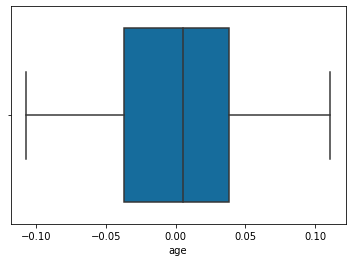

In [ ]:
import seaborn as sns
sns.boxplot(x=df['age']);

The interquartile range (IQR), the interquartile range, also called the mean or 50% mean, or technically the H-spread, is a measure of statistical variance equal to the difference between the 75th and 25th percentiles, or between the upper and lower quartiles, IQR = Q3 − Q1 [IQR](https://en.wikipedia.org/wiki/Interquartile_range)

![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)

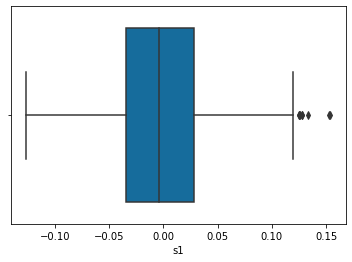

In [ ]:
sns.boxplot(x=df['s1']);

The last graph shows three outlier points between 0.1 and 0.15, not included in the box with the rest of the observations, i.e. between quartiles.

**Scatter-plot**

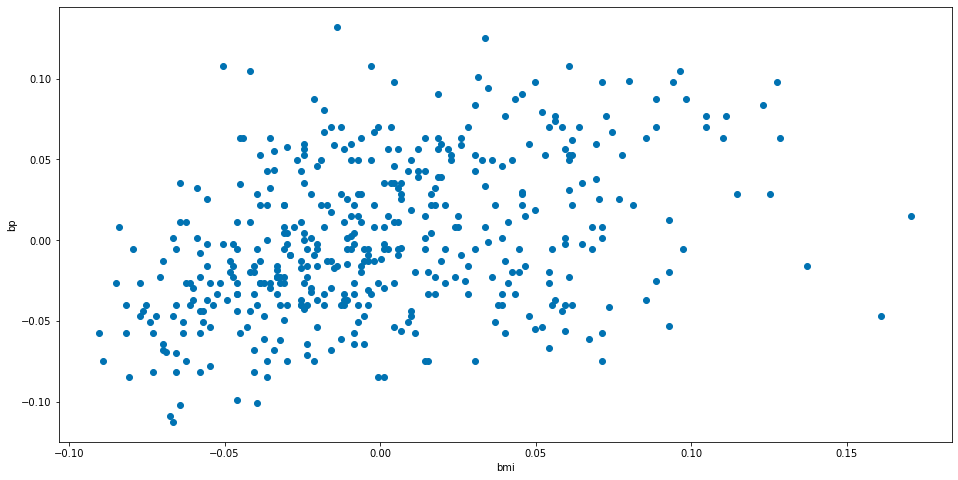

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(df['bmi'], df['bp'])
ax.set_xlabel('bmi')
ax.set_ylabel('bp')
plt.show();

It is not obvious, but points outside the "cloud" are visible.

**Z-Score**

The Z-Score is a signed number of standard deviations at which the value of an observation point or data exceeds the average value of the observed or measured value. [Z-core](https://en.wikipedia.org/wiki/Standard_score)

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.80050009 1.06548848 1.29708846 ... 0.05449919 0.41855058 0.37098854]
 [0.03956713 0.93853666 1.08218016 ... 0.83030083 1.43655059 1.93847913]
 [1.79330681 1.06548848 0.93453324 ... 0.05449919 0.06020733 0.54515416]
 ...
 [0.87686984 1.06548848 0.33441002 ... 0.23293356 0.98558469 0.32567395]
 [0.9560041  0.93853666 0.82123474 ... 0.55838411 0.93615545 0.54515416]
 [0.9560041  0.93853666 1.53537419 ... 0.83030083 0.08871747 0.06442552]]


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([ 58, 123, 123, 123, 216, 230, 230, 256, 260, 261, 269, 322, 336,
       367, 441]), array([6, 4, 5, 7, 7, 4, 5, 2, 6, 6, 6, 7, 7, 2, 6]))


In [ ]:
print(z[58][6])

3.8090716128062962


For example, the 58th observation is an outlier.

**IQR**

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age    0.075375
sex    0.095322
bmi    0.065477
bp     0.072300
s1     0.062606
s2     0.060203
s3     0.064429
s4     0.073802
s5     0.065682
s6     0.061096
dtype: float64


Since we now have IQR estimates, let's choose outliers. The code below will produce a result with true and false values. A data point with False means that these values are valid, whereas True indicates the presence of an outlier.

In [ ]:
iris_iqr = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
iris_iqr.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [ ]:
iris_iqr[iris_iqr.sum(axis=1) == 1].index

Int64Index([ 35,  58,  84, 117, 141, 168, 169, 202, 216, 245, 256, 260, 261,
            269, 276, 286, 336, 350, 353, 366, 367, 376, 406, 428, 441],
           dtype='int64')

Lines with numbers 35, 58, 84, 117, 141, 168, 169, 202, 216, 245, 256, 260, 261,
            269, 276, 286, 336, 350, 353, 366, 367, 376, 406, 428, 441 they are outliers

## Processing of missing values

In [ ]:
# the dataset is taken here: https://www.kaggle.com/uciml/pima-indians-diabetes-database
# uploading data
data = pd.read_csv('/content/drive/MyDrive/курсы/DM/Модуль 2 Предварительная обработка данных/lab/материалы для лабораторной/diabetes.csv', sep=',')
data = data.drop(["Outcome"], axis = 1) # deleting the target variable

Let's generate the gaps using the pd.sample function. \
We usually consider missing values as spaces in the data table, or as string placeholders such as NaN (i.e. not a number, not a number).

In [ ]:
data_nan = data.copy()
for i in range(15):
    random_part = data.sample(frac=0.005, axis=0).sample(n=3, axis=1)
    index = random_part.index
    col = random_part.columns[0]

    data_nan.loc[index, col] = np.NaN

data_nan.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [ ]:
data_nan.isna().sum()

Pregnancies                 16
Glucose                     12
BloodPressure                4
SkinThickness                4
Insulin                      8
BMI                          0
DiabetesPedigreeFunction     0
Age                         16
dtype: int64

**Removing incomplete vectors**

In [ ]:
data_nan.shape

(768, 8)

In [ ]:
# discard lines if there are gaps in them
data_nan.dropna(axis = 0).shape

(748, 8)

In [ ]:
# discard columns if there are gaps in them
data_nan.dropna(axis = 1).shape

(768, 4)

In [ ]:
# discard rows only if all columns contain NaN
data_nan.dropna(how = 'all', axis = 0).shape

(768, 8)

In [ ]:
# discard rows if they contain less than 3 non-NaN values
data_nan.dropna(thresh = 3).shape

(768, 8)

In [ ]:
# discard columns if they contain less than 10 non-NaN values
data_nan.dropna(thresh = 10, axis = 1).shape

(768, 8)

**SimpleImputer** \


The SimpleImputer library provides basic strategies for imputing missing values. Missing values ​​can be imputed using a constant value provided, or using statistics (mean, median, or most frequent) for each column that contains missing values. This class also allows for different encodings of missing values.

In [ ]:
from sklearn.impute import SimpleImputer

sumple_imp = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0) # fill 0
data_NA_zero = sumple_imp.fit_transform(data_nan)
data_NA_zero = pd.DataFrame(data_NA_zero, columns = data_nan.columns)
data_NA_zero.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [ ]:
data_NA_zero.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [ ]:
sumple_imp = SimpleImputer(missing_values = np.nan, strategy = 'mean') # mean - fill with average, median - fill with median, most_frequent - fill with mode
data_NA_mean = sumple_imp.fit_transform(data_nan)
data_NA_mean = pd.DataFrame(data_NA_mean, columns = data_nan.columns)
data_NA_mean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [ ]:
data_NA_mean.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

The Pandas **dataframe.interpolate()** function is primarily used to fill in NaN values ​​in a dataframe or series. But it is a very powerful function for filling in missing values. It uses various interpolation methods to fill in the missing values ​​rather than hard-coding the value.

Interpolation is a way of finding intermediate values
of a quantity given a discrete set of known values.

In [ ]:
data_inter_linear = data_nan.interpolate(method='linear')

data_inter_linear.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [ ]:
data_inter_linear.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

**Quality of filling missing values**

In [ ]:
datas = [data_NA_zero, data_NA_mean, data_inter_linear]
names = ['zero', 'mean', 'linear']
results = pd.Series(index=names)

for data_, name in zip(datas, names):
    results[name] = np.sqrt(np.mean((data - data_)**2, axis=0).mean())

results = results.sort_values(ascending=True)

results

mean      2.926036
linear    5.321465
zero      6.552808
dtype: float64

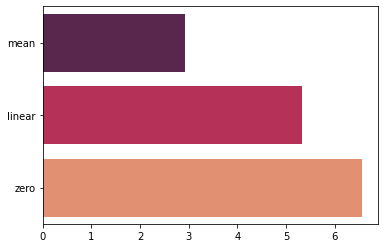

In [ ]:
sns.barplot(y=results.index, x=results.values, palette='rocket', orient='h');

In this case, filling in the average value gave the best result